# Ультимативный гайд по выживанию в ангеме

## Вспомогательные ячейки

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
from ipywidgets import widgets
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Arc
from matplotlib.transforms import IdentityTransform, TransformedBbox, Bbox

In [3]:
%matplotlib widget

## Основы

**Шарите за все действия с векторами - пропускайте этот раздел**

Ангем работает в старом добром нашем с вами пространстве, потому его легко представлять наглядно  
Чисто формально - это векторное(линейное пространство)  $ \large{\mathbb{R}^3} $

### Векторы

**Вектор** - отрезок, для которого задано начало и окончание. Обозначение: $ \overrightarrow{AB} $ или $ \overrightarrow{a} $

In [4]:
class Vector():
    def __init__(self, x_end, y_end, z_end=0, x_start=0, y_start=0, z_start=0):
        self.x_start = x_start
        self.y_start = y_start
        self.z_start = x_start
        self.x_end = x_end
        self.y_end = y_end
        self.z_end = z_end
        self.x_slider = widgets.FloatSlider(min=-8, value=x_end, max=8)
        self.y_slider = widgets.FloatSlider(min=-8, value=y_end, max=8)
        self.z_slider = widgets.FloatSlider(min=-8, value=z_end, max=8)
        self.drawing = None


    def draw_vec_2d(self, fig, ax, **kwargs):
        self.drawing = ax.quiver([[self.x_start]], [[self.y_start]], [[self.x_end]], [[self.y_end]], angles='xy', scale_units='xy', scale=1, **kwargs)


    def draw_vec_3d(self, fig, ax, **kwargs):
        self.drawing = ax.quiver([[[self.x_start]]], [[[self.y_start]]],
         [[[self.z_start]]], [[[self.x_end]]], [[[self.y_end]]], [[[self.z_end]]], **kwargs)
    

    def length(self):
        return np.linalg.norm([self.x_end - self.x_start, self.y_end - self.y_start, self.z_end - self.z_start])

    
    def bind_sliders(self, fig, ax, draw_2d=True, **kwargs):
        @interact(x=self.x_slider, y=self.y_slider, z=self.z_slider)
        def _f(x, y, z):
            self.x_end = x
            self.y_end = y
            if self.drawing != None:
                self.drawing.remove()
            if draw_2d:
                self.draw_vec_2d(fig, ax, **kwargs)
            else:
                self.z_end = z
                self.draw_vec_3d(fig, ax, **kwargs)
            fig.canvas.draw_idle()
        
    
    def __add__(self, other):
        return Vector(self.x_end + other.x_end,
        self.y_end + other.y_end,
        self.z_end + other.z_end,
        self.x_start,
        self.y_start,
        self.z_start)

    
    def __sub__(self, other):
        return Vector(self.x_end - other.x_end,
        self.y_end - other.y_end,
        self.z_end - other.z_end,
        other.x_end,
        other.y_end,
        other.z_end)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
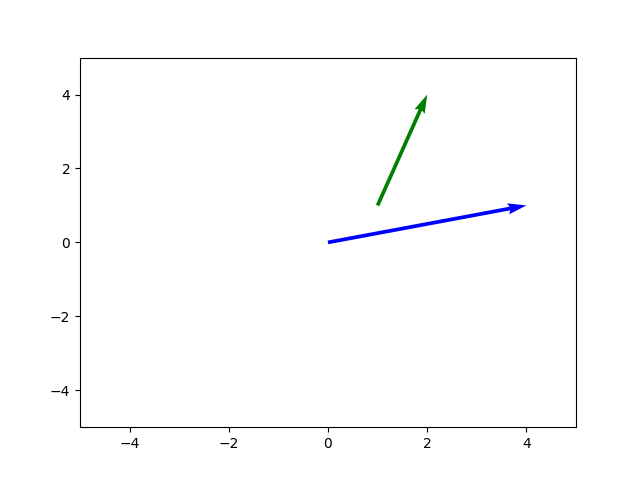

In [5]:

fig, ax = plt.subplots()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
a = Vector(1,3, x_start=1, y_start=1)
b = Vector(4,1)
a.draw_vec_2d(fig, ax, color='g')
b.draw_vec_2d(fig, ax, color='b')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
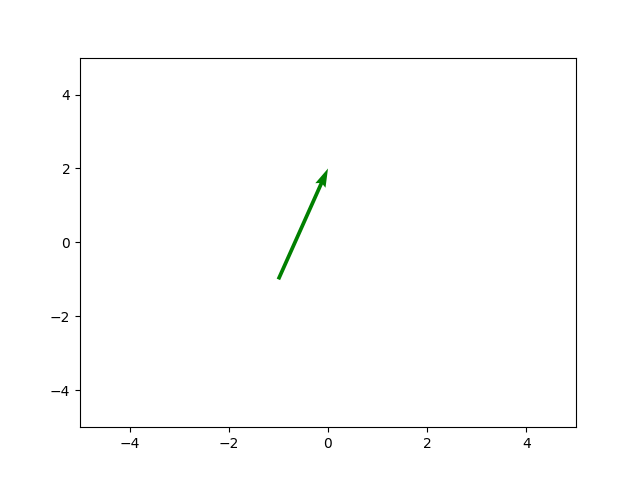

In [6]:
fig, ax = plt.subplots()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
a = Vector(1,3,x_start=-1, y_start=-1)
a.draw_vec_2d(fig, ax, color='g')
plt.show()

Длина вектора - длина его отрезка: $ |\overrightarrow{AB}| $  
Существует нулевой вектор: $ \overrightarrow{0} $, его конец совпадает с началом, у него нет направления, а длина равна нулю

Свойства векторов
1) **Коллинеарность** - если векторы лежат на параллельных прямых / на одной прямой. Обозначение: $\overrightarrow{a} || \overrightarrow{b} $. Нулевой вектор коллинеарен любому вектору
2) **Сонаправленность**/**Противоположная направленность** - если векторы коллинеарны и имеют общее направление/противоположное направление. Обозначение: $ \overrightarrow{a} \uparrow \uparrow \overrightarrow{b}  $ / 
$ \overrightarrow{a} \uparrow \downarrow \overrightarrow{b}  $
3) **Компланарность** - если 3 вектора лежат в одной плоскости (лежат на прямых, которые вместе параллельны некоторой плоскости)

*Интересное замечание: набор из одного вектора всегда коллинеарен, набор из двух векторов всегда компланарен*

#### **Равенство векторов**  
Векторы $\overrightarrow{a}$ и $\overrightarrow{b}$ считаются равными, если:
1) $ \overrightarrow{a} \uparrow \uparrow \overrightarrow{b}  $
2) $ |\overrightarrow{a}| = |\overrightarrow{b}|  $

***Важно***: не имеет значение точка приложения (место, откуда начинается вектор), учитываются лишь направление и длина

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
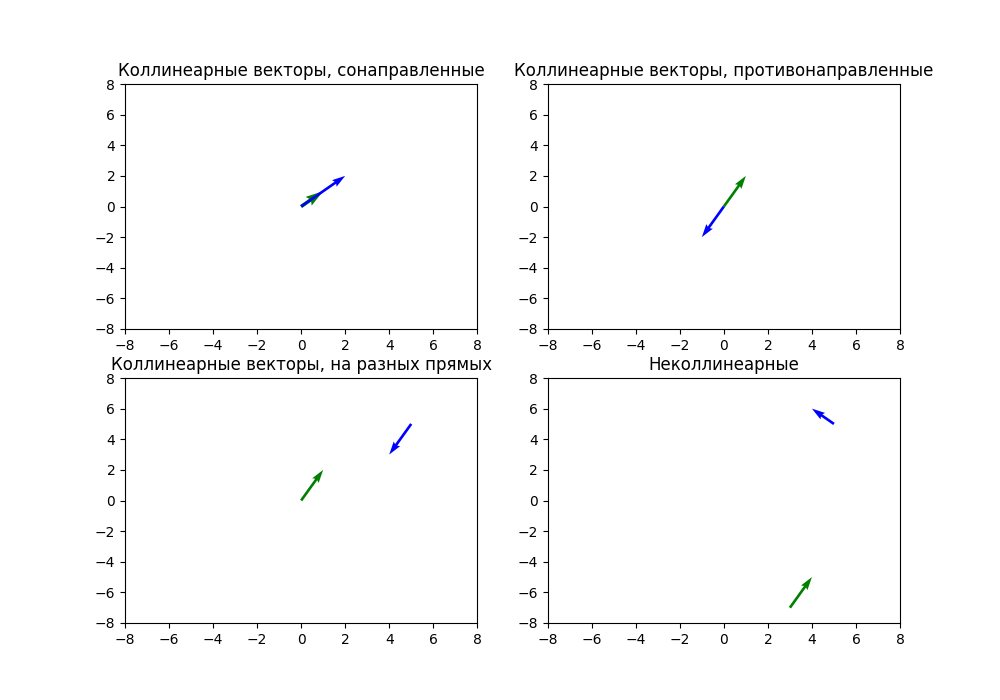

In [7]:
fig, axs = plt.subplots(2,2, figsize=(10,7))
for ax in axs.flatten():
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)

axs[0][0].set_title('Коллинеарные векторы, сонаправленные')
a = Vector(1,1)
b = Vector(2,2)
a.draw_vec_2d(fig, axs[0][0], color='g', width=0.01)
b.draw_vec_2d(fig, axs[0][0], color='b')

axs[0][1].set_title('Коллинеарные векторы, противонаправленные')
a = Vector(1,2)
b = Vector(-1,-2)
a.draw_vec_2d(fig, axs[0][1], color='g')
b.draw_vec_2d(fig, axs[0][1], color='b')


axs[1][0].set_title('Коллинеарные векторы, на разных прямых')
a = Vector(1,2)
b = Vector(-1,-2, x_start = 5, y_start=5)
a.draw_vec_2d(fig, axs[1][0], color='g')
b.draw_vec_2d(fig, axs[1][0], color='b')

axs[1][1].set_title('Неколлинеарные')
a = Vector(1,2, x_start=3, y_start=-7)
b = Vector(-1,1, x_start = 5, y_start=5)
a.draw_vec_2d(fig, axs[1][1], color='g')
b.draw_vec_2d(fig, axs[1][1], color='b')

plt.show()

А теперь playground

interactive(children=(FloatSlider(value=1.0, description='x', max=8.0, min=-8.0), FloatSlider(value=1.0, descr…

interactive(children=(FloatSlider(value=3.0, description='x', max=8.0, min=-8.0), FloatSlider(value=4.0, descr…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
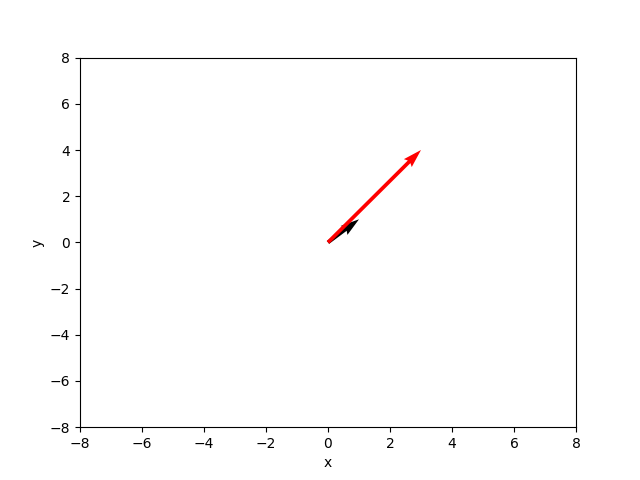

In [8]:
fig, ax = plt.subplots()

def setup_axes(ax):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)

setup_axes(ax)
vector = Vector(1, 1)
vector2 = Vector(3,4)
vector.bind_sliders(fig, ax)
vector2.bind_sliders(fig, ax, color='r')

А теперь еще и в 3D!

interactive(children=(FloatSlider(value=1.0, description='x', max=8.0, min=-8.0), FloatSlider(value=1.0, descr…

interactive(children=(FloatSlider(value=2.0, description='x', max=8.0, min=-8.0), FloatSlider(value=2.0, descr…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
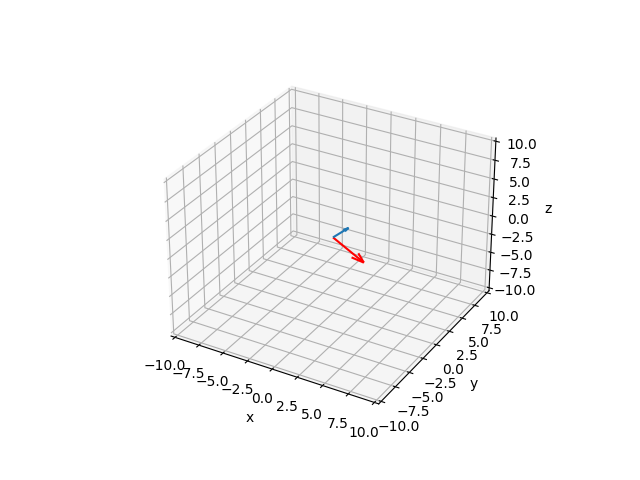

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
vector = Vector(x_end=1, y_end=1, z_end=1)
vector2 = Vector(x_end=2, y_end=2, z_end=-4)
def setup_axes(ax):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_zlim(-10,10)

setup_axes(ax)
vector.bind_sliders(fig, ax, draw_2d=False)
vector2.bind_sliders(fig, ax, draw_2d=False, color='r')
plt.show()

### Действия с векторами

#### 1) Умножение на скаляр (число)  
 

Произведение вектора $ \vec{a} $ на число $ \lambda $ - вектор $ \lambda \vec{a} $ такой, что:  
   1. $ |\lambda \vec{a}| $
   2. $ \lambda \vec{a} \uparrow \uparrow \vec{a} $ при $\lambda > 0$ и $ \lambda \vec{a} \uparrow \downarrow \vec{a} $ при $\lambda < 0$, а при $\lambda = 0$ это нулевой вектор $\vec{0}$   

Наглядно, если поиграть руками:

interactive(children=(FloatSlider(value=1.0, description='lambd', max=8.0, min=-8.0), Output()), _dom_classes=…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
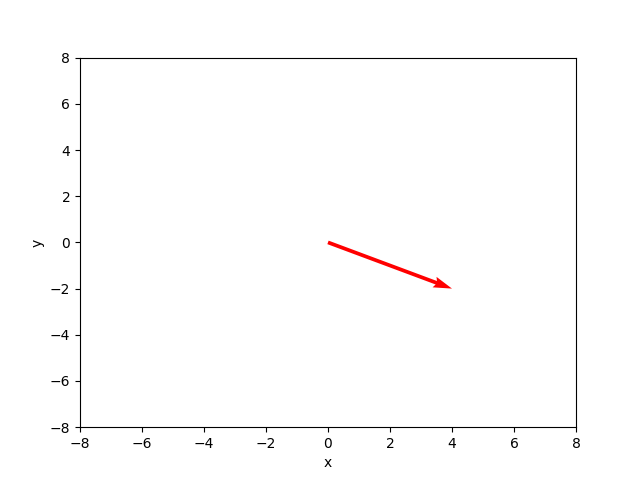

In [11]:
fig, ax = plt.subplots()

def setup_axes(ax):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)

setup_axes(ax)
start_x = 4
start_y = -2
vector = Vector(start_x, start_y)
vector.draw_vec_2d(fig, ax, color='r')

w = widgets.FloatSlider(min=-8, value=1, max=8)

@interact(lambd = w)
def _f(lambd):
    vector.x_end = start_x * lambd
    vector.y_end = start_y * lambd
    vector.drawing.remove()
    vector.draw_vec_2d(fig, ax, color='r')
    display('x:{}'.format(vector.x_end), 'y:{}'.format(vector.y_end))

Еще свойства:  
    1. $ (\lambda \mu) \vec{a} = \lambda (\mu (\vec{a}) ) $ - ассоциативность  
    2. $ \lambda (\vec{a} + \vec{b}) = \lambda \vec{a} + \lambda \vec{b}  $ - дистрибутивность относительно сложения векторов  
    3. $ (\lambda + \mu) \vec{a} = \lambda \vec{a} + \mu \vec{b} $ - дистрибутивность относительно сложения чисел

#### 2) Сложение векторов


Сумма векторов $ \vec{a} $ и $ \vec{b} $ - вектор $ \vec{c} $, идущий из начала $ \vec{a} $ в конец $ \vec{b} $, при условии, что конец вектора  $ \vec{a} $ приложен к началу вектора $ \vec{b} $  
Работает по **правилу треугольника** или по **правилу параллелограмма**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
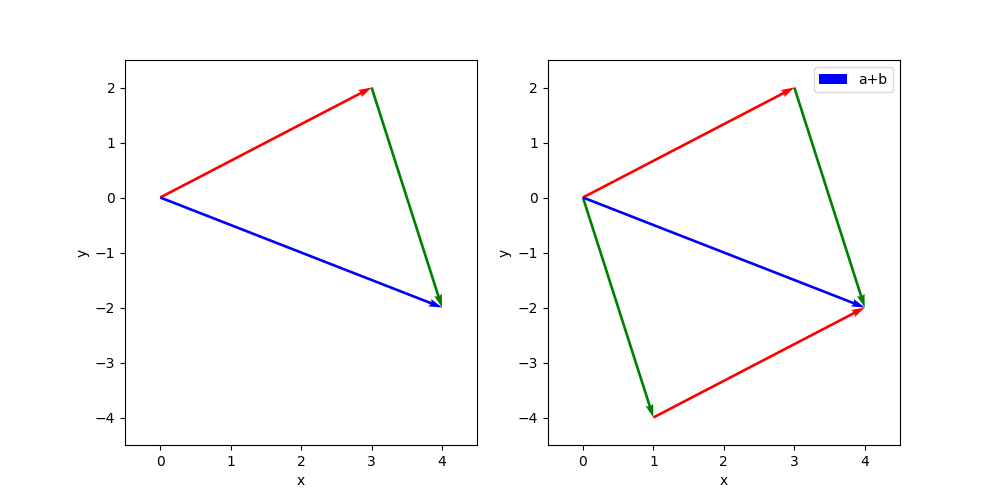

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

def setup_axes(ax):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-4.5, 2.5)

ax = axs[0]
setup_axes(ax)
a = Vector(x_end=3, y_end=2)
b = Vector(x_end=1, y_end=-4, x_start=3, y_start=2)
c = a+b
a.draw_vec_2d(fig, ax, color='r')
b.draw_vec_2d(fig, ax, color='g')
c.draw_vec_2d(fig, ax, color='b')
c.drawing.set_label('a+b')
plt.legend()

ax = axs[1]
setup_axes(ax)
a = Vector(x_end=3, y_end=2)
b = Vector(x_end=1, y_end=-4, x_start=3, y_start=2)
c = a+b
a.draw_vec_2d(fig, ax, color='r')
a.x_start = b.x_end
a.y_start = b.y_end
a.draw_vec_2d(fig, ax, color='r')
b.draw_vec_2d(fig, ax, color='g')
b.x_start = 0
b.y_start = 0
b.draw_vec_2d(fig, ax, color='g')
c.draw_vec_2d(fig, ax, color='b')
c.drawing.set_label('a+b')
plt.legend()

Еще свойства:  
    1. $ \vec{a} + \vec{b} = \vec{b} + \vec{a} $  
    2. $ (\vec{a} + \vec{b}) + \vec{c} = \vec{a} + (\vec{b} + \vec{c}) $  
    3. $ \vec{a} + \vec{0} = \vec{a} $  
    4. Существует обратный вектор: $ \forall \vec{a} \quad  \exists   \vec{b} : \vec{a} + \vec{b} = \vec{0}$, $ \vec{b} $ обозначается как $ -\vec{a} $  
    ***Замечание:*** обратный вектор такой же по длине и противоположный по направлению 

#### 3) Вычитание векторов

Разностью векторов $ \vec{a} $ и $ \vec{b} $ называется вектор $\vec{c} + \vec{b} = \vec{a}$

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
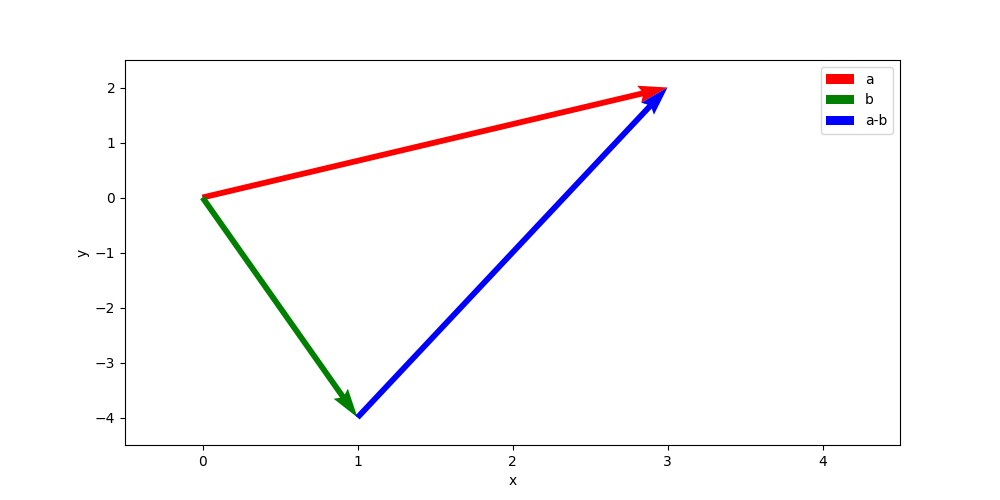

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

def setup_axes(ax):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-4.5, 2.5)

setup_axes(ax)
a = Vector(x_end=3, y_end=2)
b = Vector(x_end=1, y_end=-4)
c = a-b
a.draw_vec_2d(fig, ax, color='r')
b.draw_vec_2d(fig, ax, color='g')
c.draw_vec_2d(fig, ax, color='b')
a.drawing.set_label('a')
b.drawing.set_label('b')
c.drawing.set_label('a-b')
plt.legend()

### Углы, проекции, базисы, произведения

#### Вспомогательные ячейки

In [ ]:
class AngleAnnotation(Arc):
    """
    Draws an arc between two vectors which appears circular in display space.
    """
    def __init__(self, xy, p1, p2, size=75, unit="points", ax=None,
                 text="", textposition="inside", text_kw=None, **kwargs):
        """
        Parameters
        ----------
        xy, p1, p2 : tuple or array of two floats
            Center position and two points. Angle annotation is drawn between
            the two vectors connecting *p1* and *p2* with *xy*, respectively.
            Units are data coordinates.

        size : float
            Diameter of the angle annotation in units specified by *unit*.

        unit : str
            One of the following strings to specify the unit of *size*:

            * "pixels": pixels
            * "points": points, use points instead of pixels to not have a
              dependence on the DPI
            * "axes width", "axes height": relative units of Axes width, height
            * "axes min", "axes max": minimum or maximum of relative Axes
              width, height

        ax : `matplotlib.axes.Axes`
            The Axes to add the angle annotation to.

        text : str
            The text to mark the angle with.

        textposition : {"inside", "outside", "edge"}
            Whether to show the text in- or outside the arc. "edge" can be used
            for custom positions anchored at the arc's edge.

        text_kw : dict
            Dictionary of arguments passed to the Annotation.

        **kwargs
            Further parameters are passed to `matplotlib.patches.Arc`. Use this
            to specify, color, linewidth etc. of the arc.

        """
        self.ax = ax or plt.gca()
        self._xydata = xy  # in data coordinates
        self.vec1 = p1
        self.vec2 = p2
        self.size = size
        self.unit = unit
        self.textposition = textposition

        super().__init__(self._xydata, size, size, angle=0.0,
                         theta1=self.theta1, theta2=self.theta2, **kwargs)

        self.set_transform(IdentityTransform())
        self.ax.add_patch(self)

        self.kw = dict(ha="center", va="center",
                       xycoords=IdentityTransform(),
                       xytext=(0, 0), textcoords="offset points",
                       annotation_clip=True)
        self.kw.update(text_kw or {})
        self.text = ax.annotate(text, xy=self._center, **self.kw)

    def get_size(self):
        factor = 1.
        if self.unit == "points":
            factor = self.ax.figure.dpi / 72.
        elif self.unit[:4] == "axes":
            b = TransformedBbox(Bbox.from_bounds(0, 0, 1, 1),
                                self.ax.transAxes)
            dic = {"max": max(b.width, b.height),
                   "min": min(b.width, b.height),
                   "width": b.width, "height": b.height}
            factor = dic[self.unit[5:]]
        return self.size * factor

    def set_size(self, size):
        self.size = size

    def get_center_in_pixels(self):
        """return center in pixels"""
        return self.ax.transData.transform(self._xydata)

    def set_center(self, xy):
        """set center in data coordinates"""
        self._xydata = xy

    def get_theta(self, vec):
        vec_in_pixels = self.ax.transData.transform(vec) - self._center
        return np.rad2deg(np.arctan2(vec_in_pixels[1], vec_in_pixels[0]))

    def get_theta1(self):
        return self.get_theta(self.vec1)

    def get_theta2(self):
        return self.get_theta(self.vec2)

    def set_theta(self, angle):
        pass

    # Redefine attributes of the Arc to always give values in pixel space
    _center = property(get_center_in_pixels, set_center)
    theta1 = property(get_theta1, set_theta)
    theta2 = property(get_theta2, set_theta)
    width = property(get_size, set_size)
    height = property(get_size, set_size)

    # The following two methods are needed to update the text position.
    def draw(self, renderer):
        self.update_text()
        super().draw(renderer)

    def update_text(self):
        c = self._center
        s = self.get_size()
        angle_span = (self.theta2 - self.theta1) % 360
        angle = np.deg2rad(self.theta1 + angle_span / 2)
        r = s / 2
        if self.textposition == "inside":
            r = s / np.interp(angle_span, [60, 90, 135, 180],
                                          [3.3, 3.5, 3.8, 4])
        self.text.xy = c + r * np.array([np.cos(angle), np.sin(angle)])
        if self.textposition == "outside":
            def R90(a, r, w, h):
                if a < np.arctan(h/2/(r+w/2)):
                    return np.sqrt((r+w/2)**2 + (np.tan(a)*(r+w/2))**2)
                else:
                    c = np.sqrt((w/2)**2+(h/2)**2)
                    T = np.arcsin(c * np.cos(np.pi/2 - a + np.arcsin(h/2/c))/r)
                    xy = r * np.array([np.cos(a + T), np.sin(a + T)])
                    xy += np.array([w/2, h/2])
                    return np.sqrt(np.sum(xy**2))

            def R(a, r, w, h):
                aa = (a % (np.pi/4))*((a % (np.pi/2)) <= np.pi/4) + \
                     (np.pi/4 - (a % (np.pi/4)))*((a % (np.pi/2)) >= np.pi/4)
                return R90(aa, r, *[w, h][::int(np.sign(np.cos(2*a)))])

            bbox = self.text.get_window_extent()
            X = R(angle, r, bbox.width, bbox.height)
            trans = self.ax.figure.dpi_scale_trans.inverted()
            offs = trans.transform(((X-s/2), 0))[0] * 72
            self.text.set_position([offs*np.cos(angle), offs*np.sin(angle)])

#### 1) Угол между векторам

Переносим векторы $ \vec{a}, \vec{b} $ в одну точку (начало координат). Плоский угол $ \varphi \in [0; \pi] $ между ними называется **углом между векторами**. 
1) Если $ \varphi = 0 $, то $ \vec{a} \uparrow \uparrow \vec{b} $,
2) если $ \varphi = \pi $, то $ \vec{a} \uparrow \downarrow \vec{b} $, 
3) а если $ \varphi = \frac{\pi}{2} $, то векторы ортогональны


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
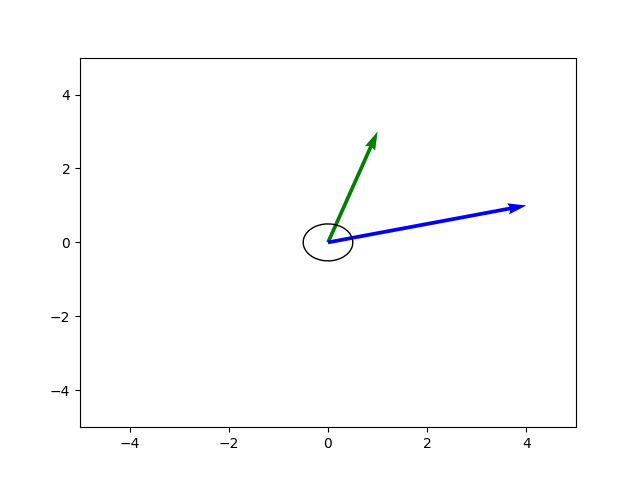

In [42]:
fig, ax = plt.subplots()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
a = Vector(1,3)
b = Vector(4,1)
a.draw_vec_2d(fig, ax, color='g')
b.draw_vec_2d(fig, ax, color='b')
arc = matplotlib.patches.Arc((0,0), 1, 1,  angle=100, linewidth=1, fill=False, zorder=1)
ax.add_patch(arc)
plt.show()

#### 2) Ортогональная проекция вектора на направление

#### 3) Скалярное произведение векторов

#### 4) ОНБ

#### 5) Векторное произведение

#### 6) Смешанное произведение векторов

## Дисклеймер и еще кое-что

Все, о чем мы тут будем говорить, гарантированно работает только в ПДСК (прямоугольная, с единичным масштабом по всем осям, с ОНБ)

## Прямая на плоскости

## Плоскость в пространстве

## Прямая в пространстве

## Кривые второго порядка (на плоскости)

## Поверхности второго порядка (в пространстве)